<a href="https://colab.research.google.com/github/elvispletsch/bibliotecapandas/blob/main/Desafio_Preveja_os_usu%C3%A1rios_com_alta_chance_de_deixar_seu_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nomes das colunas:
Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id'],
      dtype='object')

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
d

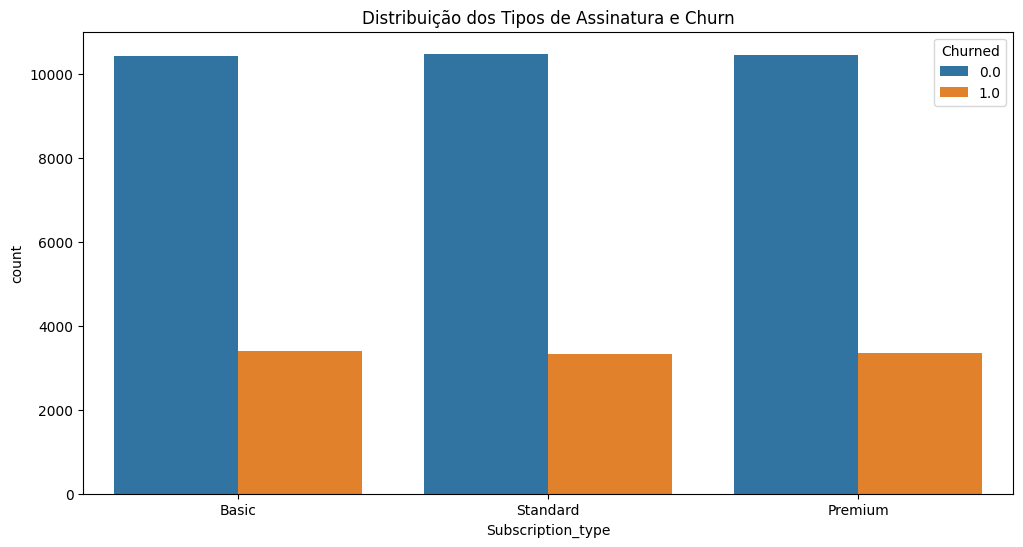

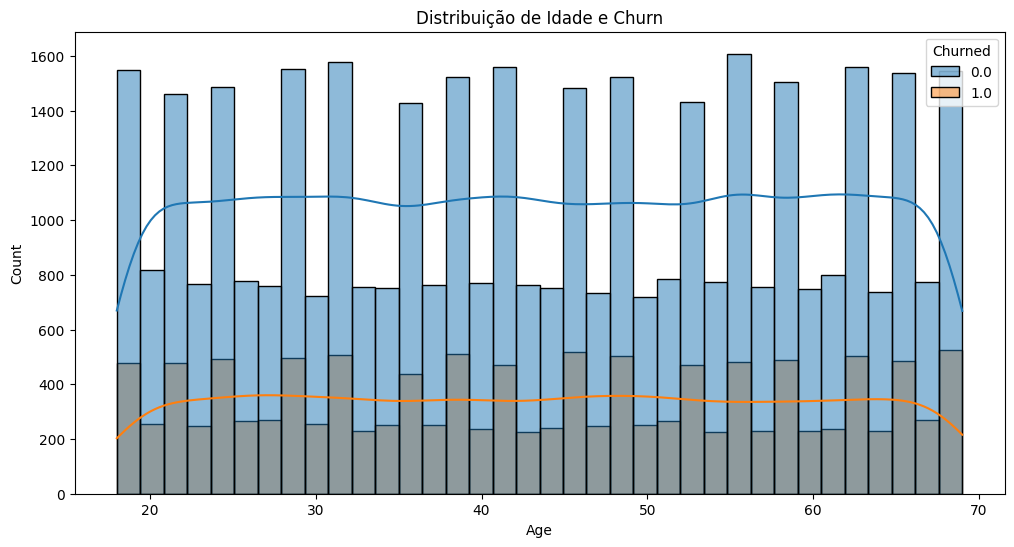

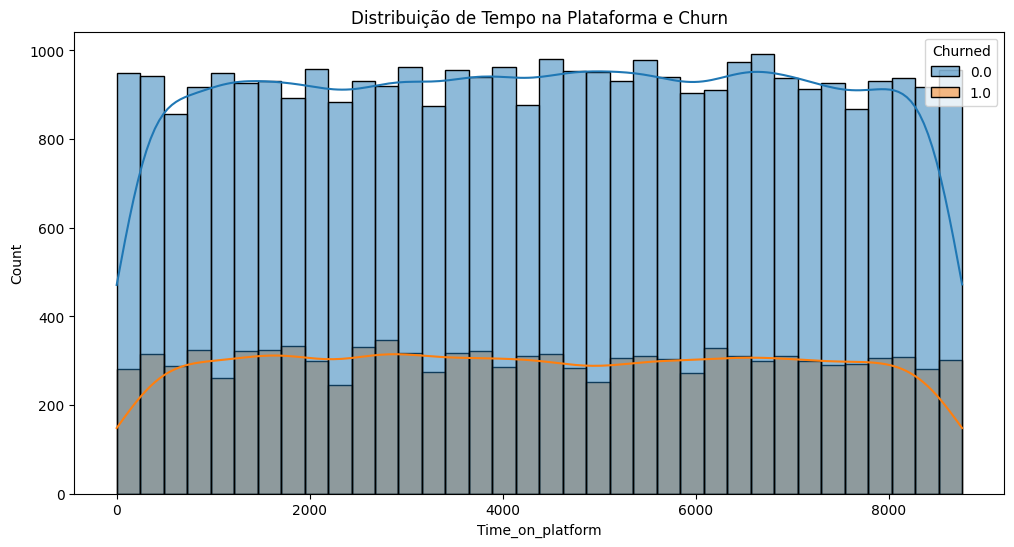

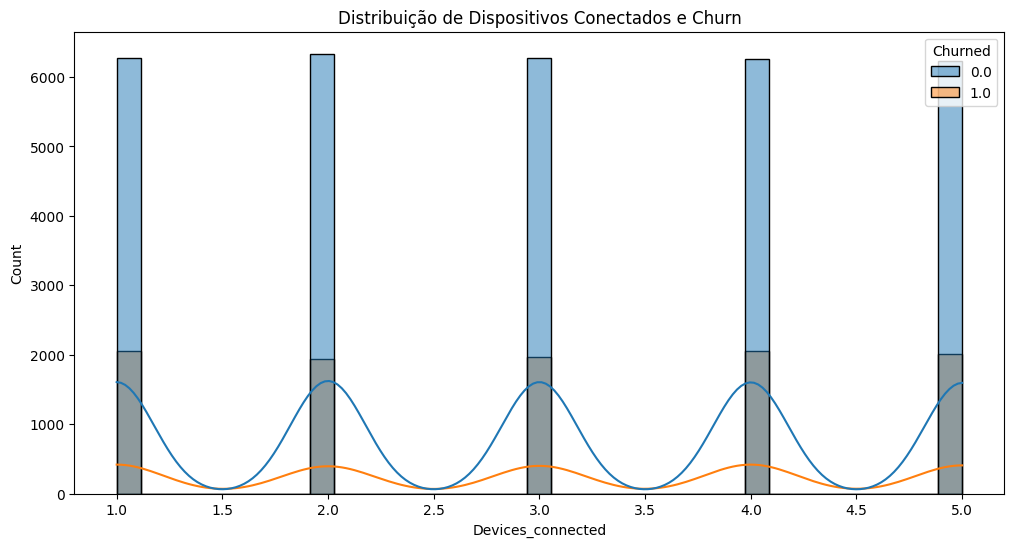

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB
None
    Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male            4700.0                3.0             Basic   
1  69.0  Female            6107.0            

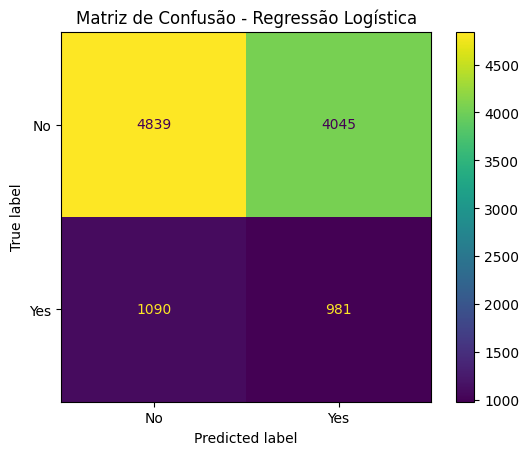

Métricas do modelo de Regressão Logística:
              precision    recall  f1-score   support

           0       0.82      0.54      0.65      8884
           1       0.20      0.47      0.28      2071

    accuracy                           0.53     10955
   macro avg       0.51      0.51      0.46     10955
weighted avg       0.70      0.53      0.58     10955



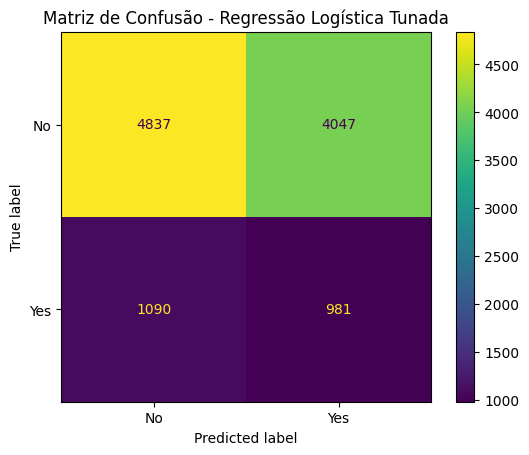

Métricas do melhor modelo de Regressão Logística:
              precision    recall  f1-score   support

           0       0.82      0.54      0.65      8884
           1       0.20      0.47      0.28      2071

    accuracy                           0.53     10955
   macro avg       0.51      0.51      0.46     10955
weighted avg       0.70      0.53      0.58     10955



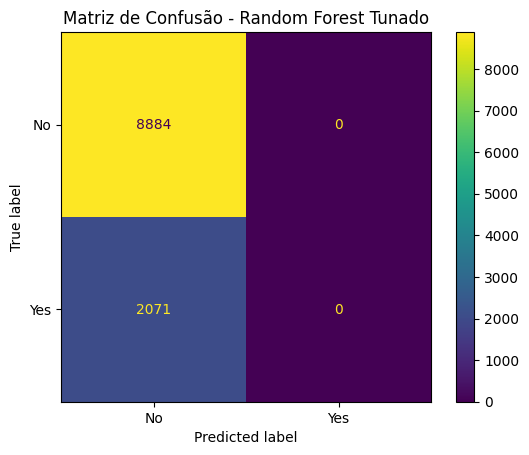

Métricas do melhor modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8884
           1       0.00      0.00      0.00      2071

    accuracy                           0.81     10955
   macro avg       0.41      0.50      0.45     10955
weighted avg       0.66      0.81      0.73     10955



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Carregando os dados
df = pd.read_csv('streaming_data.csv')

# Verificar os nomes das colunas
print("Nomes das colunas:")
print(df.columns)

# Exemplo de ajuste de nomes de colunas
# df.rename(columns={
#     'Tipo_assinatura': 'subscription_type',
#     'Cancelou': 'churned'
# }, inplace=True)

# Verificação dos tipos de dados e valores faltantes
print("\nInformações do DataFrame:")
print(df.info())

print("\nValores faltantes:")
print(df.isna().sum())

# Descrição estatística dos dados
print("\nDescrição estatística:")
print(df.describe())

# Visualização de distribuições
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subscription_type', hue='Churned')
plt.title('Distribuição dos Tipos de Assinatura e Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', kde=True, hue='Churned')
plt.title('Distribuição de Idade e Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time_on_platform', kde=True, hue='Churned')
plt.title('Distribuição de Tempo na Plataforma e Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Devices_connected', kde=True, hue='Churned')
plt.title('Distribuição de Dispositivos Conectados e Churn')
plt.show()

# ETAPA 2

# Substituir valores NaN por 0 nas colunas especificadas
df[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']] = df[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']].fillna(0)

# Dropar linhas nulas nas colunas Gender, Subscription_type e Age
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

# Transformar valores de Churned de 0 e 1 para "No" e "Yes" usando .loc
df.loc[:, 'Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

# Transformar valores floats em inteiros onde necessário usando .loc
cols_to_int = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']
df.loc[:, cols_to_int] = df[cols_to_int].astype(int)

print(df.info())
print(df.head())

# ETAPA 3

# Definir variáveis X e y
X = df.drop(columns=['User_id', 'Churned'])
y = df['Churned']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Escalar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Regressão Logística
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)

# Previsões Regressão Logística
y_pred_logistic = log_model.predict(X_test)

# Matriz de confusão e métricas Regressão Logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cmd_logistic = ConfusionMatrixDisplay(cm_logistic, display_labels=le.classes_)
cmd_logistic.plot()
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

print("Métricas do modelo de Regressão Logística:")
print(classification_report(y_test, y_pred_logistic))

# ETAPA 4

# Parâmetros para grid search de Regressão Logística
param_grid_logistic = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Grid search com cross-validation para Regressão Logística
grid_logistic = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid_logistic, cv=5)
grid_logistic.fit(X_train, y_train)

# Melhor modelo de Regressão Logística
best_log_model = grid_logistic.best_estimator_

# Previsões Regressão Logística Tunada
y_pred_logistic_tuned = best_log_model.predict(X_test)

# Matriz de confusão e métricas Regressão Logística Tunada
cm_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)
cmd_logistic_tuned = ConfusionMatrixDisplay(cm_logistic_tuned, display_labels=le.classes_)
cmd_logistic_tuned.plot()
plt.title('Matriz de Confusão - Regressão Logística Tunada')
plt.show()

print("Métricas do melhor modelo de Regressão Logística:")
print(classification_report(y_test, y_pred_logistic_tuned))

# ETAPA 5

# Parâmetros para grid search de Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Grid search com cross-validation para Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Melhor modelo de Random Forest
best_rf_model = grid_rf.best_estimator_

# Previsões Random Forest Tunado
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Matriz de confusão e métricas Random Forest Tunado
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
cmd_rf_tuned = ConfusionMatrixDisplay(cm_rf_tuned, display_labels=le.classes_)
cmd_rf_tuned.plot()
plt.title('Matriz de Confusão - Random Forest Tunado')
plt.show()

print("Métricas do melhor modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf_tuned))
